In [40]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use("dark_background")

print(cv2.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

4.2.0


In [10]:
dataset_path = "H:\Datasets\increase-image-resolution-using-superresolution"
images_path = os.path.join(dataset_path, "images")
image_path = os.path.join(images_path, "000000044.jpg")
dataset_files = os.listdir(images_path)
print(dataset_files[0:8])

['000000000.jpg', '000000001.jpg', '000000002.jpg', '000000003.jpg', '000000004.jpg', '000000005.jpg', '000000006.jpg', '000000007.jpg']


In [23]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = image / 255
# print(image.max(), image.min())

lr_img_1_size = 100
lr_img_2_size = 50
lr_img_3_size = 10
sr_img_h = sr_img_w = image.shape[1]

lr_img_1 = cv2.resize(image, (lr_img_1_size, lr_img_1_size))
lr_img_1 = cv2.resize(lr_img_1, (sr_img_h, sr_img_w))

lr_img_2 = cv2.resize(image, (lr_img_2_size, lr_img_2_size))
lr_img_2 = cv2.resize(lr_img_2, (sr_img_h, sr_img_w))

lr_img_3 = cv2.resize(image, (lr_img_3_size, lr_img_3_size))
lr_img_3 = cv2.resize(lr_img_3, (sr_img_h, sr_img_w))

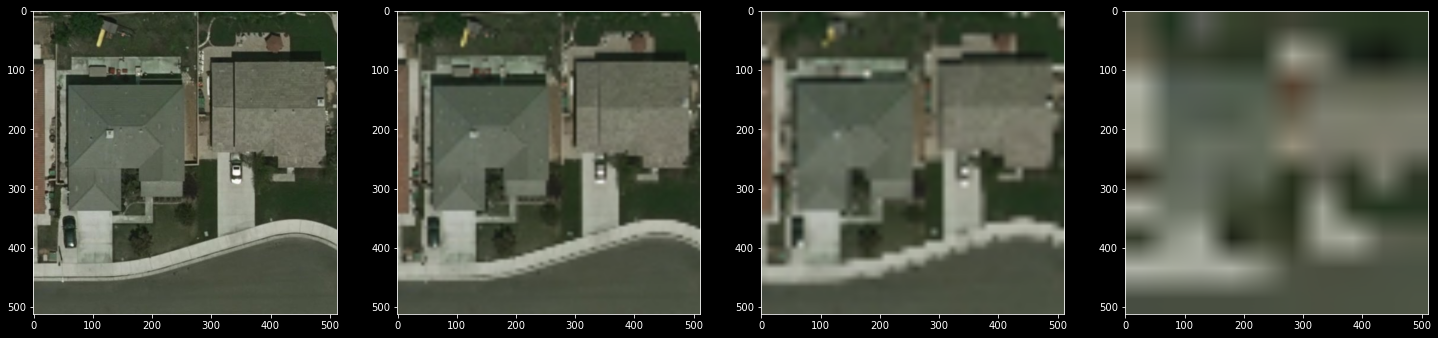

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(25, 25))
ax[0].imshow(image)
ax[1].imshow(lr_img_1)
ax[2].imshow(lr_img_2)
ax[3].imshow(lr_img_3)

images = [image, lr_img_1, lr_img_2, lr_img_3]

In [32]:
def reference_metric_result(images: list, metric: callable, higher_is_better: bool) -> bool:
    '''
    \param images: list of images, from best to worst
    \param metric: metric function to use
    \param higher_is_better: true if higher value of metric is better
    \return true if test passed (metric if has worse value for every following image)
    '''
    reference_image = images[0]
    images = images[1:]
    
    metric_values = []
    for image in images:
        metric_values.append(metric(reference_image, image))
        
    prev_value = metric_values[0]
    for value in metric_values:
        if higher_is_better:
            if prev_value < value:
                return False
        else:
            if prev_value > value:
                return False
    
    return True

## Quantity metrics

In [44]:
from sewar.full_ref import uqi, mse, rmse, psnr, rmse_sw, ssim, ergas, scc, rase, sam, msssim, vifp, psnrb 

# higher metric value is better
print("uqi:\t", reference_metric_result(images, uqi, True))
print("scc:\t", reference_metric_result(images, scc, True))
print("psnr:\t", reference_metric_result(images, psnr, True))
print("ssim:\t", reference_metric_result(images, ssim, True))
print("vifp:\t", reference_metric_result(images, vifp, True))
print("psnrb:\t", reference_metric_result(images, psnrb, True))
print("msssim:\t", reference_metric_result(images, msssim, True))

# higher metric value is worse
print("sam:\t", reference_metric_result(images, sam, False))
print("mse:\t", reference_metric_result(images, mse, False))
print("rase:\t", reference_metric_result(images, rase, False))
print("rmse:\t", reference_metric_result(images, rmse, False))
print("ergas:\t", reference_metric_result(images, ergas, False))

uqi:	 True
scc:	 True
psnr:	 True
ssim:	 True
vifp:	 True
psnrb:	 True
msssim:	 True
sam:	 True
mse:	 True
rase:	 True
rmse:	 True
ergas:	 True


## Quality metrics

### 1) Brisque (higher metric value is worse)

In [46]:
import imquality.brisque as brisque

for image in images:
    print(brisque.score(image))

39.59337669053852
82.7180103465042
91.6497620228333
110.24714854148235


## Test model perfomance

In [ ]:
def test(model_path):
    
    
    
    